In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score
from graphviz import Source

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
X = df.drop("Class",1)   #Feature Matrix
y = df["Class"]          #Target Variable
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y )

In [5]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [6]:
clf.fit(X_train, y_train)
y_pred =  clf.predict(X_test)

In [7]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('Recall Score on test data',recall_score(y_test,y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9992275552122467
Recall Score on test data 0.7244897959183674


[Text(107.0602370689655, 208.38, 'X[14] <= -4.242\nentropy = 0.018\nsamples = 56962\nvalue = [56864, 98]'),
 Text(59.16724137931034, 190.26, 'X[10] <= -1.847\nentropy = 0.997\nsamples = 158\nvalue = [84, 74]'),
 Text(37.52068965517241, 172.14, 'X[27] <= 1.708\nentropy = 0.641\nsamples = 86\nvalue = [14, 72]'),
 Text(23.089655172413792, 154.01999999999998, 'X[12] <= -1.891\nentropy = 0.406\nsamples = 74\nvalue = [6, 68]'),
 Text(11.544827586206896, 135.89999999999998, 'X[4] <= -0.031\nentropy = 0.189\nsamples = 69\nvalue = [2, 67]'),
 Text(5.772413793103448, 117.77999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(17.317241379310346, 117.77999999999999, 'X[15] <= 0.973\nentropy = 0.111\nsamples = 68\nvalue = [1, 67]'),
 Text(11.544827586206896, 99.66, 'entropy = 0.0\nsamples = 60\nvalue = [0, 60]'),
 Text(23.089655172413792, 99.66, 'X[15] <= 1.002\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(17.317241379310346, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nva

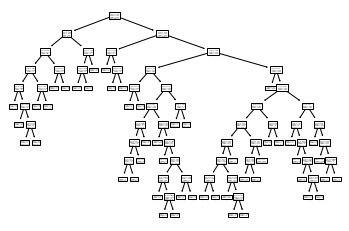

In [8]:
tree.plot_tree(clf.fit(X_test,y_test)) 

In [9]:
graph = Source( tree.export_graphviz(clf, out_file=None, feature_names=X.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

'dtree_render.png'